In [2]:
import pandas as pd

In [3]:
df =pd.read_csv('data/data.csv')
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [5]:
df["Discount construct"].value_counts()

Discount construct
50% off upto Rs.100       3561
Flat 15% off              1489
Flat Rs.200 off           1116
60% off upto Rs.120       1102
Flat Rs.150 off            816
                          ... 
Buy 1 Get 1 - ₹554.00        1
Buy 1 Get 1 - ₹910.00        1
Flat Rs.586 off              1
Buy 1 Get 1 - ₹1238.00       1
Flat Rs.760 off              1
Name: count, Length: 527, dtype: int64

In [7]:
df["Restaurant discount (Promo)"].value_counts()

Restaurant discount (Promo)
0.00      10262
100.00     2791
90.00      1177
80.00      1048
99.00       971
          ...  
242.40        1
83.06         1
113.81        1
226.20        1
274.50        1
Name: count, Length: 700, dtype: int64

In [3]:
import pandas as pd
from datetime import datetime

# Assuming you already have your df with "Order Placed At"
df["Order Placed At"] = pd.to_datetime(df["Order Placed At"])

# Get unique dates (just the date part)
unique_dates = df["Order Placed At"].dt.date.unique()

# Your major events dictionary
major_events_delhi = {
    "2024-01-01": {"event": "New Year’s Day", "holiday": True},
    "2024-01-14": {"event": "Makar Sankranti / Lohri / Pongal", "holiday": False},
    "2024-01-26": {"event": "Republic Day", "holiday": True},
    "2024-02-14": {"event": "Basant Panchami / Saraswati Puja", "holiday": False},
    "2024-03-25": {"event": "Holi", "holiday": False},
    "2024-03-30": {"event": "Ram Navami", "holiday": False},
    "2024-04-17": {"event": "Mahavir Jayanti", "holiday": False},
    "2024-04-19": {"event": "Good Friday", "holiday": True},
    "2024-04-21": {"event": "Easter Sunday", "holiday": False},
    "2024-05-23": {"event": "Buddha Purnima", "holiday": False},
    "2024-06-17": {"event": "Rath Yatra", "holiday": False},
    "2024-07-16": {"event": "Guru Purnima", "holiday": False},
    "2024-08-17": {"event": "Raksha Bandhan", "holiday": False},
    "2024-08-15": {"event": "Independence Day", "holiday": True},
    "2024-08-26": {"event": "Janmashtami", "holiday": False},
    "2024-09-07": {"event": "Ganesh Chaturthi", "holiday": False},
    "2024-09-08": {"event": "Navratri Begins", "holiday": False},
    "2024-09-05": {"event": "Teachers’ Day", "holiday": False},
    "2024-09-17": {"event": "Muharram", "holiday": False},
    "2024-10-12": {"event": "Dussehra / Vijayadashami", "holiday": False},
    "2024-11-01": {"event": "Diwali / Deepavali", "holiday": False},
    "2024-11-02": {"event": "Govardhan Puja / Annakut", "holiday": False},
    "2024-11-03": {"event": "Bhai Dooj", "holiday": False},
    "2024-11-15": {"event": "Guru Nanak Jayanti / Gurpurab", "holiday": False},
    "2024-11-02": {"event": "Karva Chauth", "holiday": False},
    "2024-12-25": {"event": "Christmas Day", "holiday": True},
    "2024-12-31": {"event": "New Year’s Eve", "holiday": False}
}

# Build a new DataFrame
event_data = []
for d in unique_dates:
    d_str = d.isoformat()  # convert datetime.date to 'YYYY-MM-DD'
    info = major_events_delhi.get(d_str, {"event": "No significant event", "holiday": False})
    event_data.append({
        "date": d,
        "event": info["event"],
        "holiday": info["holiday"]
    })

df_events = pd.DataFrame(event_data)

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_99686/4101891633.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Placed At"] = pd.to_datetime(df["Order Placed At"])


In [4]:
df_events

,date,event,holiday
0,2024-09-10,No significant event,False
1,2024-09-09,No significant event,False
2,2024-09-08,Navratri Begins,False
3,2024-09-07,Ganesh Chaturthi,False
4,2024-09-06,No significant event,False
...,...,...,...
148,2025-01-25,No significant event,False
149,2025-01-24,No significant event,False
150,2025-01-23,No significant event,False
151,2025-01-22,No significant event,False


In [5]:
# Export the DataFrame to CSV
df_events.to_csv("delhi_major_events.csv", index=False)

print("CSV file 'delhi_major_events.csv' created successfully!")


CSV file 'delhi_major_events.csv' created successfully!


In [6]:
df_events[df_events["event"] != "No significant event"]

,date,event,holiday
2,2024-09-08,Navratri Begins,False
3,2024-09-07,Ganesh Chaturthi,False
5,2024-09-05,Teachers’ Day,False
13,2024-09-17,Muharram,False
48,2024-10-12,Dussehra / Vijayadashami,False
68,2024-11-03,Bhai Dooj,False
69,2024-11-02,Karva Chauth,False
70,2024-11-01,Diwali / Deepavali,False
76,2024-11-15,Guru Nanak Jayanti / Gurpurab,False
111,2024-12-31,New Year’s Eve,False


In [7]:
import pandas as pd

# Ensure datetime
df["Order Placed At"] = pd.to_datetime(df["Order Placed At"])

# Extract date part for merging
df["order_date"] = df["Order Placed At"].dt.date

# Ensure df_events['date'] is datetime.date
df_events["date"] = pd.to_datetime(df_events["date"]).dt.date

# Merge with all original columns intact
df_merged = df.merge(df_events, left_on="order_date", right_on="date", how="left")

# Drop the duplicate 'date' column from df_events
df_merged.drop(columns=["date"], inplace=True)


In [8]:
df_merged.shape

(21321, 32)

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_99686/1002277301.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='num_orders', data=orders_per_day, palette='Set2')


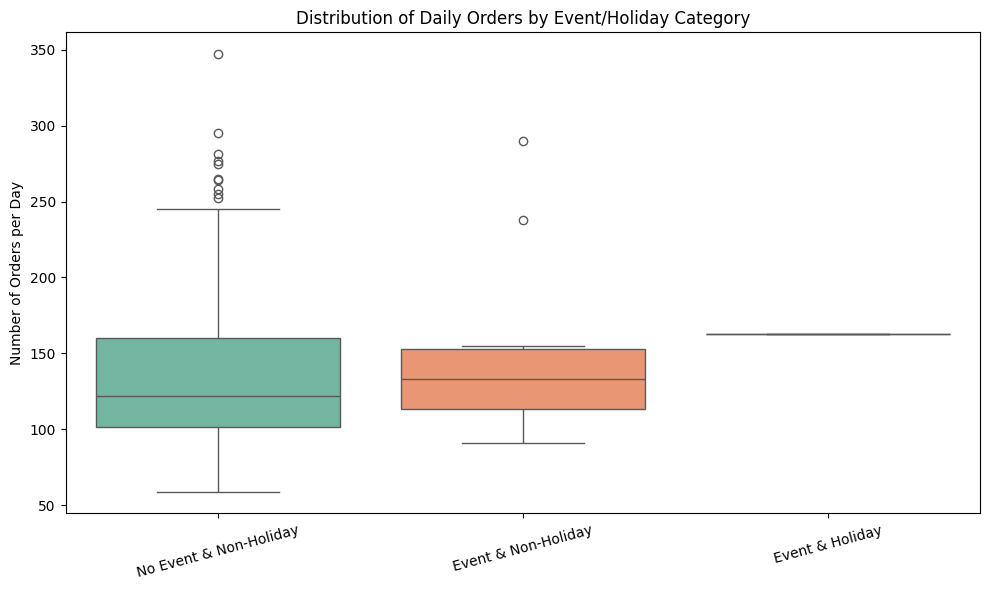

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure order_date exists
df_merged['order_date'] = pd.to_datetime(df_merged['Order Placed At']).dt.date

# Aggregate orders per day
orders_per_day = df_merged.groupby('order_date').size().reset_index(name='num_orders')

# Merge event info
event_info = df_merged[['order_date', 'event', 'holiday']].drop_duplicates(subset='order_date')
orders_per_day = orders_per_day.merge(event_info, on='order_date', how='left')

# Categorize each day
def categorize(row):
    if row['event'] != "No significant event" and row['holiday']:
        return 'Event & Holiday'
    elif row['event'] != "No significant event":
        return 'Event & Non-Holiday'
    elif row['holiday']:
        return 'No Event & Holiday'
    else:
        return 'No Event & Non-Holiday'

orders_per_day['category'] = orders_per_day.apply(categorize, axis=1)

# Boxplot to show distribution of daily orders by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='num_orders', data=orders_per_day, palette='Set2')
plt.title("Distribution of Daily Orders by Event/Holiday Category")
plt.xlabel("")
plt.ylabel("Number of Orders per Day")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


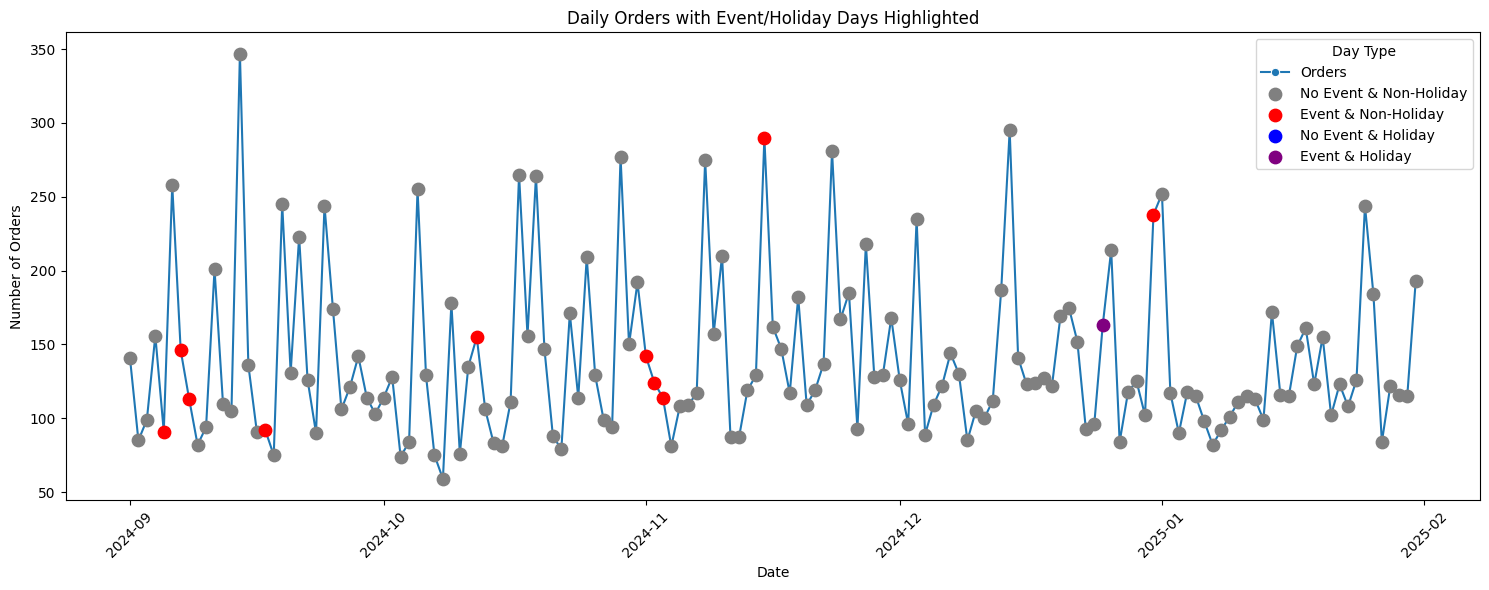

In [10]:
plt.figure(figsize=(15,6))
sns.lineplot(x='order_date', y='num_orders', data=orders_per_day, marker='o', label='Orders')

# Highlight event/holiday days
palette = {'No Event & Non-Holiday':'grey',
           'Event & Non-Holiday':'red',
           'No Event & Holiday':'blue',
           'Event & Holiday':'purple'}

for cat, color in palette.items():
    subset = orders_per_day[orders_per_day['category']==cat]
    plt.scatter(subset['order_date'], subset['num_orders'], color=color, s=80, label=cat, zorder=5)

plt.title("Daily Orders with Event/Holiday Days Highlighted")
plt.ylabel("Number of Orders")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID', 'order_date'],
      dtype='object')

Discount Effectiveness Summary:

                                       Discount Type  avg_discount  \
0                        Restaurant discount (Promo)         65.09   
1  Restaurant discount (Flat offs, Freebies & oth...         31.80   
2                                Brand pack discount          3.04   
3                                      Gold discount          0.10   

   total_discount  used_in_orders  avg_total_when_used  
0      1387822.61           11059               693.49  
1       677902.44            1848               507.43  
2        64801.42             870               716.23  
3         2113.50              28               691.32  


/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_99686/2592558640.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_99686/2592558640.py:75: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/saugatshakya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


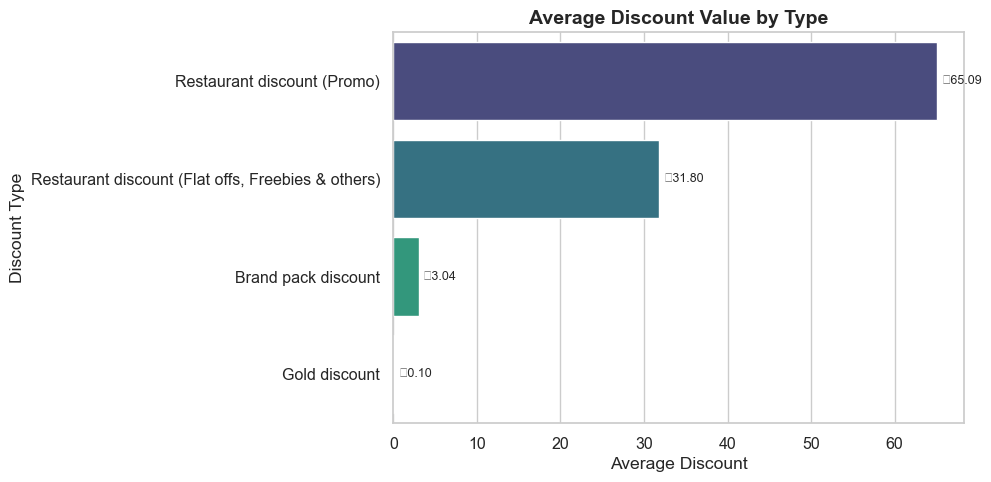

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_99686/2592558640.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_99686/2592558640.py:110: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/saugatshakya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


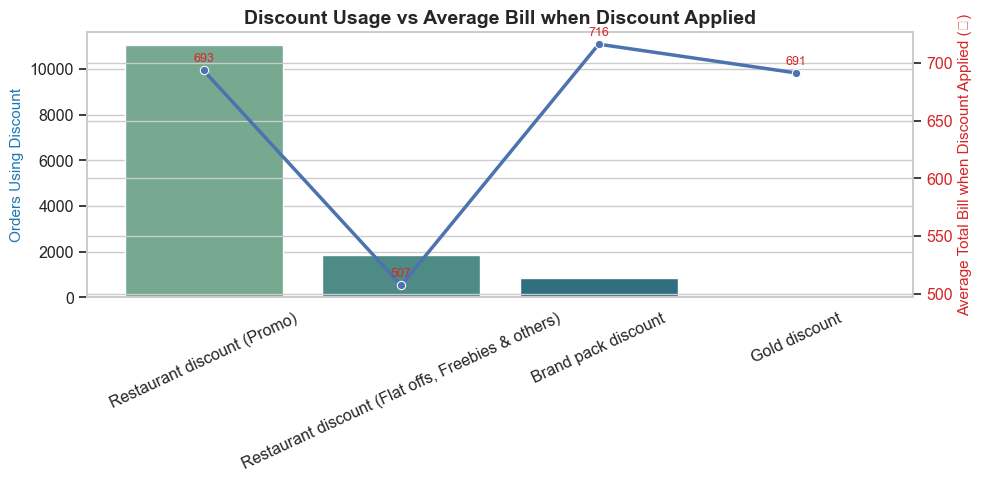

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.05)

# --- Discount columns in your df ---
discount_cols = [
    'Restaurant discount (Promo)',
    'Restaurant discount (Flat offs, Freebies & others)',
    'Gold discount',
    'Brand pack discount'
]

# Ensure numeric and fill NaN
df[discount_cols] = df[discount_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Melt to long form (keep Total so we can measure avg Total when discount is used)
discount_long = df.melt(
    id_vars=['Order ID', 'Total'],        # keep Order ID to count unique orders optionally
    value_vars=discount_cols,
    var_name='Discount Type',
    value_name='Discount Amount'
)

# Summary stats:
# - avg_discount: mean of Discount Amount (including zeros)
# - total_discount: sum of Discount Amount
# - used_in_orders: number of orders where Discount Amount > 0
# - avg_total_when_used: mean Total only for rows where Discount Amount > 0
agg_all = discount_long.groupby('Discount Type', as_index=False).agg(
    avg_discount=('Discount Amount', 'mean'),
    total_discount=('Discount Amount', 'sum'),
    used_in_orders=('Discount Amount', lambda x: (x > 0).sum())
)

# average total only where discount applied
avg_total_when_used = (
    discount_long[discount_long['Discount Amount'] > 0]
    .groupby('Discount Type', as_index=True)['Total']
    .mean()
    .rename('avg_total_when_used')
    .reset_index()
)

# Merge
discount_summary = agg_all.merge(avg_total_when_used, on='Discount Type', how='left')

# Fill NaN avg_total_when_used with 0 (if a discount type never used)
discount_summary['avg_total_when_used'] = discount_summary['avg_total_when_used'].fillna(0)

# Round nicely
discount_summary[['avg_discount', 'total_discount', 'avg_total_when_used']] = \
    discount_summary[['avg_discount', 'total_discount', 'avg_total_when_used']].round(2)

# Sort for plotting
discount_summary = discount_summary.sort_values('used_in_orders', ascending=False).reset_index(drop=True)

print("Discount Effectiveness Summary:\n")
print(discount_summary)

# --- Plot A: Average discount value (horizontal bars) ---
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=discount_summary,
    y='Discount Type',
    x='avg_discount',
    palette='viridis'
)
plt.title('Average Discount Value by Type', fontsize=14, weight='bold')
plt.xlabel('Average Discount')
for c in ax.containers:
    ax.bar_label(c, fmt='₹%.2f', label_type='edge', padding=3, fontsize=9)
plt.tight_layout()
plt.show()

# --- Plot B: Usage (bars) vs Average bill when used (line) ---
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(
    data=discount_summary,
    x='Discount Type',
    y='used_in_orders',
    palette='crest',
    ax=ax1
)
ax1.set_ylabel('Orders Using Discount', color='#1f77b4', fontsize=11)
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=25)
ax1.set_title('Discount Usage vs Average Bill when Discount Applied', fontsize=14, weight='bold')

ax2 = ax1.twinx()
sns.lineplot(
    data=discount_summary,
    x='Discount Type',
    y='avg_total_when_used',
    sort=False,
    marker='o',
    linewidth=2.5,
    ax=ax2
)
ax2.set_ylabel('Average Total Bill when Discount Applied (₹)', color='#d62728', fontsize=11)
ax2.tick_params(axis='y', labelcolor='#d62728')

# Annotate avg_total_when_used above points
for i, row in discount_summary.iterrows():
    ax2.text(i, row['avg_total_when_used'] + max(discount_summary['avg_total_when_used'])*0.01,
             f"{row['avg_total_when_used']:.0f}", ha='center', color='#d62728', fontsize=9)

plt.tight_layout()
plt.show()
